Python has a lot of basic functionality. But for a lot of what we're going to do we need additional tools for data handing, plotting, statistics, etc... 

We import these as needed using the "import" command.

In [1]:
# we will be using a data handling library called pandas
# which is basically a python spreadsheet

import pandas as pd

# this is here to shut off some annoying warnings from pandas
pd.options.mode.chained_assignment = None

# matplotlib is one of the main plotting libraries we're going to use
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


# the other plotting library is seaborn - we'll use both during the class

import seaborn as sns

# numpy and scipy are for handling numerical and scientific data

import numpy as np
import scipy as sp

import statsmodels.formula.api as smf # basic statistical modeling

In [2]:
df = pd.read_csv("data/galton/galton.csv")

In [3]:
df.head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [4]:
df.shape

(934, 8)

In [5]:
df.describe()

,h_father,h_mother,h_parentmean,n_children,childnum,h_child
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931
std,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251
min,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000
25%,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000
50%,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000
75%,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000
max,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000


(array([  5.,  26., 100., 219., 181., 171., 183.,  41.,   6.,   2.]),
 array([56. , 58.3, 60.6, 62.9, 65.2, 67.5, 69.8, 72.1, 74.4, 76.7, 79. ]),
 <a list of 10 Patch objects>)

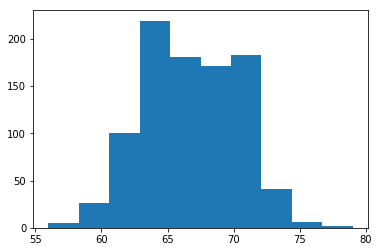

In [6]:
plt.hist(df.h_child)

Text(0.5, 1.0, 'Heights of parents by sex')

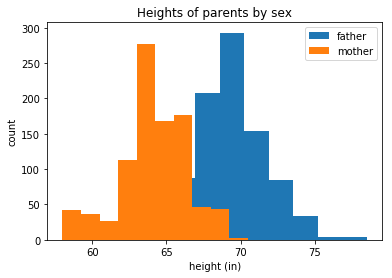

In [7]:
plt.hist(df.h_father,bins=10,label="father")
plt.hist(df.h_mother,bins=10,label="mother")
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

In [8]:
df[df.childgender == 'female'].head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
6,2,75.5,66.5,73.66,4,3,female,65.5
7,2,75.5,66.5,73.66,4,4,female,65.5


Text(0.5, 1.0, 'Heights of children by sex')

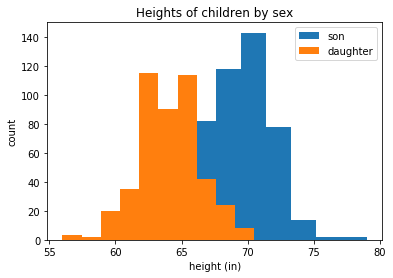

In [9]:
dfp = df[df.childgender == 'male']
plt.hist(dfp.h_child,bins=10,label="son")

dfp = df[df.childgender == 'female']
plt.hist(dfp.h_child,bins=10,label="daughter")

plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of children by sex")

There is a clear height difference between males and females. Should we correct for it?

In [10]:
print ("Mean of father's height: ", df['h_father'].mean())
print ("Mean of mother's height: ", df['h_mother'].mean())
print ("Ratio: ", df['h_father'].mean()/df['h_mother'].mean())

Mean of father's height:  69.19710920770873
Mean of mother's height:  64.08929336188437
Ratio:  1.0796984266464407


Text(0.5, 1.0, 'Heights of parents by sex')

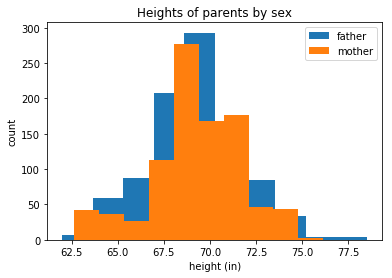

In [11]:
plt.hist(df.h_father,bins=10,label="father")
plt.hist(df.h_mother * 1.08,bins=10,label="mother")
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

Text(0.5, 1.0, 'Heights of parents by sex')

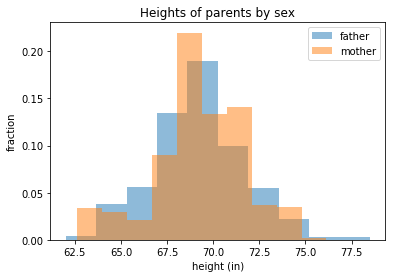

In [12]:
plt.hist(df.h_father,bins=10,label="father",density=True,alpha=.5)
plt.hist(df.h_mother * 1.08,bins=10,label="mother",density=True,alpha=.5)
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("fraction")
plt.title("Heights of parents by sex")

Is same true for children?

In [13]:
daughter_mean = df[df['childgender'] == 'female']['h_child'].mean()
print ("Mean of daughter's height: ", daughter_mean)

son_mean = df[df['childgender'] == 'male']['h_child'].mean()

print ("Mean of mother's height: ", son_mean)
print ("Ratio: ", son_mean / daughter_mean)

Mean of daughter's height:  64.10397350993381
Mean of mother's height:  69.2340956340957
Ratio:  1.080028145577698


Looks good (almost too good ....)

In [14]:
# create adjusted columns

df['hc_father'] = df['h_father']
df['hc_mother'] = df['h_mother'] * 1.08

df['hc_child'] = df['h_child']

dft = df[df['childgender'] == 'female']

df.loc[dft.index,'hc_child'] = dft['h_child'] * 1.08

In [15]:
df.head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child,hc_father,hc_mother,hc_child
0,1,78.5,67.0,75.43,4,1,male,73.2,78.5,72.36,73.200
1,1,78.5,67.0,75.43,4,2,female,69.2,78.5,72.36,74.736
2,1,78.5,67.0,75.43,4,3,female,69.0,78.5,72.36,74.520
3,1,78.5,67.0,75.43,4,4,female,69.0,78.5,72.36,74.520
4,2,75.5,66.5,73.66,4,1,male,73.5,75.5,71.82,73.500


Text(0.5, 1.0, 'Heights of children by sex')

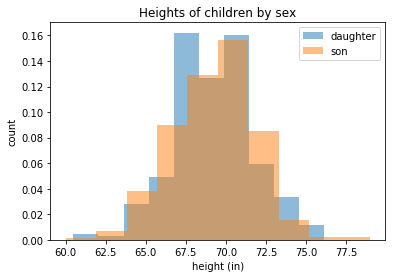

In [16]:
dfp = df[df.childgender == 'female']
plt.hist(dfp.hc_child,bins=10,label="daughter",density=True,alpha=0.5)

dfp = df[df.childgender == 'male']
plt.hist(dfp.hc_child,bins=10,label="son",density=True,alpha=0.5)
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of children by sex")

In [17]:
df['hc_parentmean'] = 0.5 * (df['hc_father'] + df['hc_mother'])

Text(0.5, 1.0, 'parent vs. child height')

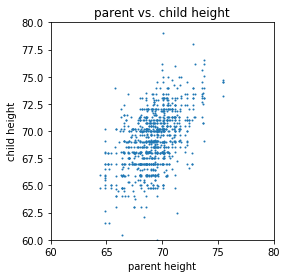

In [18]:
plt.figure(figsize=(4,4))
plt.scatter(df.hc_parentmean,df.hc_child,s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")
plt.title("parent vs. child height")

Text(0, 0.5, 'frequency')

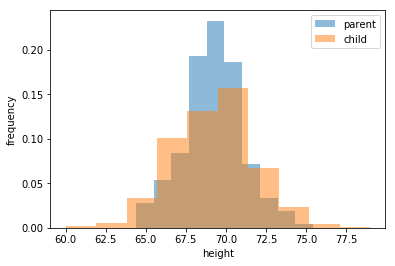

In [19]:
plt.hist(df['hc_parentmean'],density=True,alpha=.5,label='parent')
plt.hist(df['hc_child'],density=True,alpha=.5,label='child')
plt.legend()
plt.xlabel("height")
plt.ylabel("frequency")

Text(0.5, 1.0, 'father vs. child height')

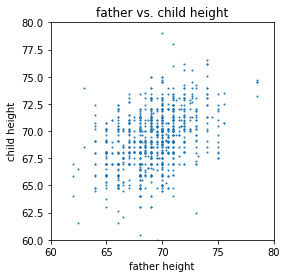

In [20]:
plt.figure(figsize=(4,4))
plt.scatter(df.hc_father,df.hc_child,s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("father height")
plt.ylabel("child height")
plt.title("father vs. child height")

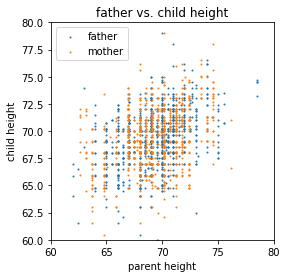

In [21]:
plt.figure(figsize=(4,4))
plt.scatter(df.hc_father,df.hc_child,s=1,label='father')
plt.scatter(df.hc_mother,df.hc_child,s=1,label='mother')
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")
plt.title("father vs. child height")
plt.legend()

How good is the fit?

In [22]:
np.corrcoef(df.hc_parentmean,df.hc_child)

array([[1.        , 0.49701225],
       [0.49701225, 1.        ]])

In [23]:
sp.stats.pearsonr(df.hc_parentmean,df.hc_child)

(0.49701225336482485, 1.9957624357919138e-59)

In [24]:
sp.stats.linregress(df.hc_parentmean,df.hc_child)

LinregressResult(slope=0.7125849916953029, intercept=19.917512779548566, rvalue=0.49701225336482424, pvalue=1.995762435792103e-59, stderr=0.04075238205342484)

In [25]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df.hc_parentmean,df.hc_child)

In [26]:
model = smf.ols(formula='hc_child ~ hc_parentmean', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     305.8
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           2.00e-59
Time:                        10:04:45   Log-Likelihood:                -2079.0
No. Observations:                 934   AIC:                             4162.
Df Residuals:                     932   BIC:                             4172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.9175      2.821      7.060      0.000      14.381      25.454
hc_parentmean     0.7126      0.041     17.486      0.000       0.633       0.793
==============================================================================
Omnibus:                        8.229   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.082
Skew:                          -0.116   Prob(JB):                      0.00647
Kurtosis:                       3.453   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df['hc_predm'] = 19.9175 + 0.7126 * df['hc_parentmean']

Text(0, 0.5, 'predicted child height')

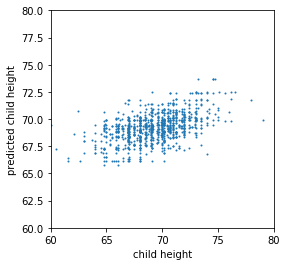

In [28]:
plt.figure(figsize=(4,4))
plt.scatter(df.hc_child,df.hc_predm, s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("child height")
plt.ylabel("predicted child height")


Text(0, 0.5, 'frequency')

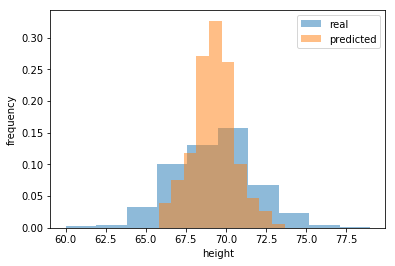

In [29]:
plt.hist(df['hc_child'],density=True,alpha=.5,label='real')
plt.hist(df['hc_predm'],density=True,alpha=.5,label='predicted')
plt.legend()
plt.xlabel("height")
plt.ylabel("frequency")

Why do you think there is such a different distribution? 

In [30]:
model = smf.ols(formula='hc_child ~ hc_father + hc_mother', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     156.6
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           2.31e-59
Time:                        10:04:49   Log-Likelihood:                -2076.1
No. Observations:                 934   AIC:                             4158.
Df Residuals:                     931   BIC:                             4173.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9250      2.814      7.081      0.000      14.403      25.447
hc_father      0.4087      0.030     13.791      0.000       0.351       0.467
hc_mother      0.3038      0.030     10.241      0.000       0.246       0.362
==============================================================================
Omnibus:                        8.375   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.633
Skew:                          -0.103   Prob(JB):                      0.00491
Kurtosis:                       3.480   Cond. No.                     3.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model.params

Intercept    19.924951
hc_father     0.408706
hc_mother     0.303786
dtype: float64

In [32]:
df['hc_pred_mf'] = 19.925 + .4087 * df['hc_father'] + .3038 * df['hc_mother']

Text(0.5, 1.0, 'comparison of height predictions')

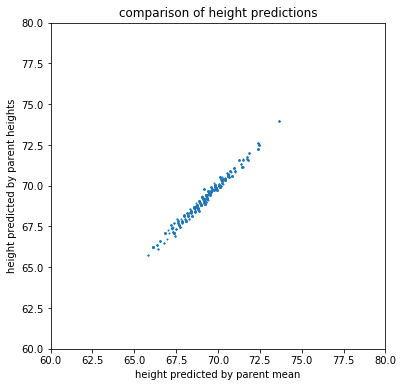

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(df.hc_predm,df.hc_pred_mf,s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("height predicted by parent mean")
plt.ylabel("height predicted by parent heights")
plt.title("comparison of height predictions")



We might want to force the intercept to go through 0

In [37]:
x = df.hc_parentmean.values
y = df.hc_child.values
x = x[:,np.newaxis]

y0_slope, _,_,_ = np.linalg.lstsq(x,y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [38]:
plot_x = np.linspace(60,80,500)

Text(0.5, 1.0, 'different fits of parent and child heights')

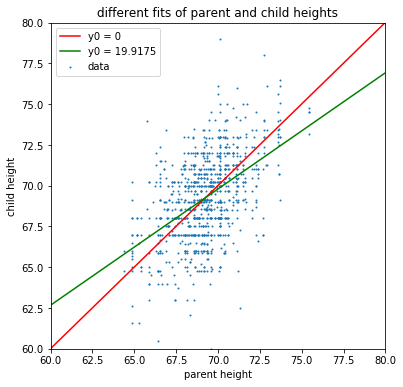

In [40]:
plt.figure(figsize=(6,6))

plt.scatter(df.hc_parentmean,df.hc_child, s=1, label='data')

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")

plt.plot(plot_x,y0_slope*plot_x,c='red',label = "y0 = 0")
plt.plot(plot_x,19.9175 + 0.7126 * plot_x,c='green', label="y0 = 19.9175")
plt.legend()
plt.title("different fits of parent and child heights")


Text(0.5, 1.0, 'relationship between parent and child heights')

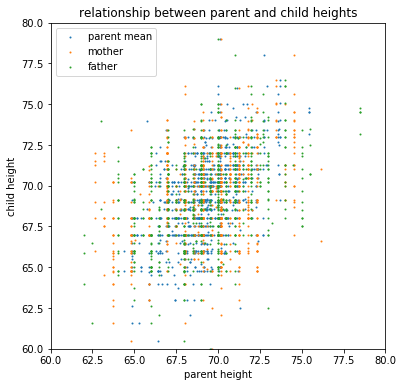

In [41]:
plt.figure(figsize=(6,6))

plt.scatter(df.hc_parentmean,df.hc_child, s=1, label='parent mean')
plt.scatter(df.hc_mother,df.hc_child, s=1, label='mother')
plt.scatter(df.hc_father,df.hc_child, s=1, label='father')

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")

plt.legend()
plt.title("relationship between parent and child heights")


Text(0.5, 1.0, 'Heights of parents by sex')

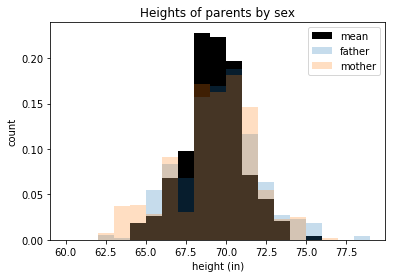

In [42]:
bins = np.arange(60,80,1)
plt.hist(df.hc_parentmean,bins=bins,label="mean",density=True,color='black')
plt.hist(df.hc_father,bins=bins,label="father",density=True,alpha=.25)
plt.hist(df.hc_mother,bins=bins,label="mother",density=True,alpha=.25)

plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

Is there any relationship between the height of the mother and father?

Text(0.5, 1.0, 'height of father vs. mother')

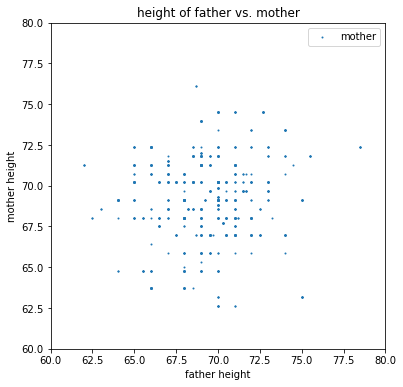

In [44]:
plt.figure(figsize=(6,6))

plt.scatter(df.hc_father,df.hc_mother, s=1, label='mother')

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("father height")
plt.ylabel("mother height")

plt.legend()
plt.title("height of father vs. mother")


In [45]:
sp.stats.pearsonr(df.hc_father,df.hc_mother)

(0.06036611903664484, 0.06517071113937872)

Answer: only a weak correlation between height of father and mother

Can we learn anything extra from heights of children? 

In [46]:
df.head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child,hc_father,hc_mother,hc_child,hc_parentmean,hc_predm,hc_pred_mf
0,1,78.5,67.0,75.43,4,1,male,73.2,78.5,72.36,73.200,75.43,73.668918,73.990918
1,1,78.5,67.0,75.43,4,2,female,69.2,78.5,72.36,74.736,75.43,73.668918,73.990918
2,1,78.5,67.0,75.43,4,3,female,69.0,78.5,72.36,74.520,75.43,73.668918,73.990918
3,1,78.5,67.0,75.43,4,4,female,69.0,78.5,72.36,74.520,75.43,73.668918,73.990918
4,2,75.5,66.5,73.66,4,1,male,73.5,75.5,71.82,73.500,73.66,72.407616,72.600766


In [47]:
# create a "pivot table" that uses one column from df as rows, another as columns and a third as values

pt = pd.pivot_table(df,values=['hc_child'],index=['family'],columns=['childnum'],aggfunc='mean')

In [48]:
pt.head()

hc_child                                                             \
childnum       1       2      3      4      5     6   7   8   9   10  11  12   
family                                                                         
1           73.20  74.736  74.52  74.52    NaN   NaN NaN NaN NaN NaN NaN NaN   
10          70.74     NaN    NaN    NaN    NaN   NaN NaN NaN NaN NaN NaN NaN   
100         71.20  71.000  70.00    NaN    NaN   NaN NaN NaN NaN NaN NaN NaN   
101         75.00  74.000  72.00  68.50    NaN   NaN NaN NaN NaN NaN NaN NaN   
102         70.00  68.500  68.00  70.20  68.04  67.5 NaN NaN NaN NaN NaN NaN   

                      
childnum  13  14  15  
family                
1        NaN NaN NaN  
10       NaN NaN NaN  
100      NaN NaN NaN  
101      NaN NaN NaN  
102      NaN NaN NaN

In [49]:
# for simplicity let's create subset of the pivot table that 
# only looks at 1st and 2nd children
# and gets rid of any row that doesn't have a value (i.e. is "NaN")

pt12 = pt['hc_child'][[1,2]].dropna()

Text(0.5, 1.0, 'comparison of sibling heights')

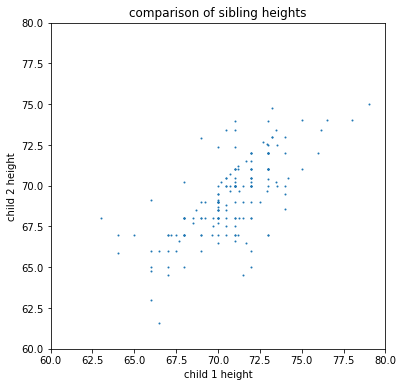

In [50]:
# now compare sibling heights

plt.figure(figsize=(6,6))


plt.scatter(pt12[1],pt12[2],s=1)

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("child 1 height")
plt.ylabel("child 2 height")
plt.title("comparison of sibling heights")



Which do we think would be better correlated, parent mean height to child height or sibling height to child height? 

In [57]:
print ("Correlation of father to child", sp.stats.pearsonr(df.hc_parentmean,df.hc_child))
print ("Correlation of child 1 to child 2", sp.stats.pearsonr(pt12[1],pt12[2]))

Correlation of father to child (0.49701225336482485, 1.9957624357919138e-59)
Correlation of child 1 to child 2 (0.6928410896399662, 6.323985060265486e-26)


We're not using all the data here since many of these childrent have more than 1 sibling. So instead of the pivot table let's create a new column in our original dataframe that has for each child the average height of their siblings.

In [43]:
df.head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child,hc_father,hc_mother,hc_child,hc_parentmean,hc_predm,hc_pred_mf
0,1,78.5,67.0,75.43,4,1,male,73.2,78.5,72.36,73.200,75.43,73.668918,73.990918
1,1,78.5,67.0,75.43,4,2,female,69.2,78.5,72.36,74.736,75.43,73.668918,73.990918
2,1,78.5,67.0,75.43,4,3,female,69.0,78.5,72.36,74.520,75.43,73.668918,73.990918
3,1,78.5,67.0,75.43,4,4,female,69.0,78.5,72.36,74.520,75.43,73.668918,73.990918
4,2,75.5,66.5,73.66,4,1,male,73.5,75.5,71.82,73.500,73.66,72.407616,72.600766


In [58]:
#
# logic here is that we go row by row throught the df
# for each row we make a new dataframe containing rows from same family, but not same kid
# if the length of that new dataframe is > 0, then we average the height of the children
# since these are siblings of the original child
# and set the 'hc_sibmean' field to that value
#

inds = []
sibmeans = []

for index, row in df.iterrows():
    ldf = df[(df.family == row.family) & (df.childnum != row.childnum)]
    if len(ldf > 0):
        inds.append(index)
        sibmeans.append(np.mean(ldf.hc_child.values))
        
df.loc[inds,'hc_sibmean'] = sibmeans

In [60]:
# get rid of any rows that have NaN, which are ones where there's an only child

df2 = df.dropna().copy()

Text(0.5, 1.0, 'child vs sibling heights')

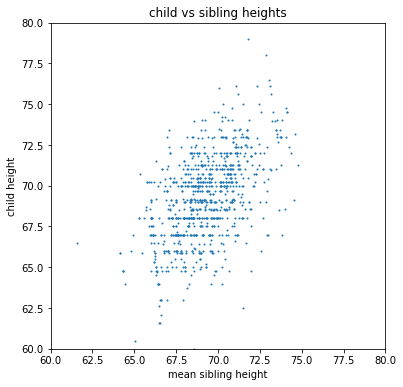

In [62]:
plt.figure(figsize=(6,6))


plt.scatter(df2.hc_sibmean,df2.hc_child,s=1)

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("mean sibling height")
plt.ylabel("child height")
plt.title("child vs sibling heights")



Which is a better predictor -- parent height or sibling height? 

In [63]:
print ("Correlation of parentmean to child", sp.stats.pearsonr(df2.hc_parentmean,df2.hc_child))
print ("Correlation of siblingmean to child", sp.stats.pearsonr(df2.hc_sibmean,df2.hc_child))

Correlation of parentmean to child (0.49175183341826845, 4.890905983121034e-56)
Correlation of siblingmean to child (0.5295988865776516, 2.76628208175731e-66)


In [65]:
model = smf.ols(formula='hc_child ~ hc_parentmean', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     286.7
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           4.89e-56
Time:                        10:23:43   Log-Likelihood:                -2009.2
No. Observations:                 901   AIC:                             4022.
Df Residuals:                     899   BIC:                             4032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.0786      2.904      6.914      0.000      14.379      25.778
hc_parentmean     0.7102      0.042     16.933      0.000       0.628       0.793
==============================================================================
Omnibus:                        8.046   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                9.910
Skew:                          -0.114   Prob(JB):                      0.00705
Kurtosis:                       3.460   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model = smf.ols(formula='hc_child ~ hc_sibmean', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     350.4
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           2.77e-66
Time:                        10:24:12   Log-Likelihood:                -1985.7
No. Observations:                 901   AIC:                             3975.
Df Residuals:                     899   BIC:                             3985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7980      2.642      7.494      0.000      14.613      24.983
hc_sibmean     0.7140      0.038     18.720      0.000       0.639       0.789
==============================================================================
Omnibus:                       10.005   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.672
Skew:                          -0.168   Prob(JB):                      0.00292
Kurtosis:                       3.445   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Would it help to include siblings in height predictions? Need to associate each child with the heights of their siblings. 

In [82]:
df3 = df2[df2.n_children > 4]

print ("Correlation of parentmean to child", sp.stats.pearsonr(df3.hc_parentmean,df3.hc_child))
print ("Correlation of siblingmean to child", sp.stats.pearsonr(df3.hc_sibmean,df3.hc_child))

model = smf.ols(formula='hc_child ~ hc_sibmean', data=df3).fit()
model.summary()

Correlation of parentmean to child (0.47679718327337606, 4.780646714053949e-39)
Correlation of siblingmean to child (0.5159513145053524, 1.6387358828036986e-46)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     240.5
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           1.64e-46
Time:                        12:08:08   Log-Likelihood:                -1466.5
No. Observations:                 665   AIC:                             2937.
Df Residuals:                     663   BIC:                             2946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8609      3.373      4.999      0.000      10.238      23.484
hc_sibmean     0.7562      0.049     15.509      0.000       0.660       0.852
==============================================================================
Omnibus:                       11.398   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.841
Skew:                          -0.186   Prob(JB):                     0.000599
Kurtosis:                       3.630   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
What does R^2 or percent of variance explained mean?

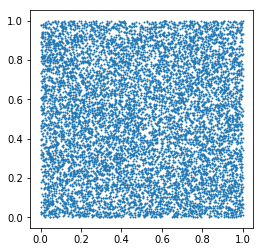

In [109]:
x = np.random.rand(n)
y = np.random.rand(n)

n = 10000 # number of points

plt.figure(figsize=(4,4))

plt.scatter(x,y,s=1)

In [110]:
slope, intercept, r, p, err = sp.stats.linregress(x,y)

print ("correlation = ", "%.5f" % r)
print ("variance explained = ", "%.5f" % (r * r))

correlation =  -0.01139
variance explained =  0.00013


Now what if I make y dependent on x?

correlation =  1.00000
variance explained =  1.00000
(1.0, 0.0)


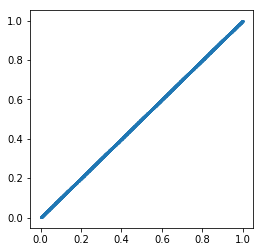

In [137]:
x = np.random.rand(n)
y = x 

n = 10000 # number of points

plt.figure(figsize=(4,4))

plt.scatter(x,y,s=1)

slope, intercept, r, p, err = sp.stats.linregress(x,y)

print ("correlation = ", "%.5f" % r)


correlation =  0.70613
variance explained =  0.49863


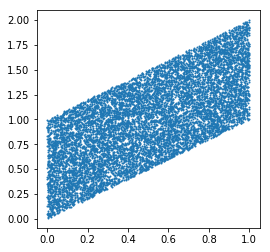

In [113]:
x = np.random.rand(n)
y = x + np.random.rand(n)

n = 10000 # number of points

plt.figure(figsize=(4,4))

plt.scatter(x,y,s=1)

slope, intercept, r, p, err = sp.stats.linregress(x,y)

print ("correlation = ", "%.5f" % r)
print ("variance explained = ", "%.5f" % (r * r))

In [131]:
def crand(n):
    return 2 * (np.random.rand(n) - .5)

correlation =  0.89476
variance explained =  0.80060
(0.8947625050491309, 0.0)
0.33332440636174504 0.41645541329121527 0.8003843766311206


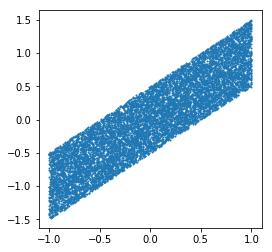

In [143]:
f = .5

x = crand(n)
e = crand(n)
y = x + f * e

n = 10000 # number of points

plt.figure(figsize=(4,4))

plt.scatter(x,y,s=1)

slope, intercept, r, p, err = sp.stats.linregress(x,y)

print ("correlation = ", "%.5f" % r)
print ("variance explained = ", "%.5f" % (r * r))
print (sp.stats.pearsonr(x,y))
print (np.var(x),np.var(y),np.var(x)/np.var(y))

In [167]:
np.ceil(abs(max(np.concatenate((x,y)),key=abs)))

6.0

variance in x 0.7773178166355735
variance in y 0.9757376739147771
correlation =  0.89120
variance explained =  0.79424


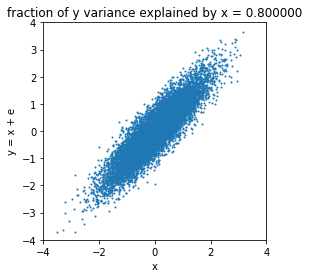

In [172]:

n = 10000 # number of points

fv = .8

# sample from normal distributions
x = np.random.normal(0,np.sqrt(fv),n)
e = np.random.normal(0,np.sqrt(1.0-fv),n)

y = x + e

plt.figure(figsize=(4,4))
plim = np.ceil(abs(max(np.concatenate((x,y)),key=abs)))
plt.xlim(-plim,plim)
plt.ylim(-plim,plim)
plt.scatter(x,y,s=1)
plt.xlabel("x")
plt.ylabel("y = x + e")
plt.title("fraction of y variance explained by x = %f" % fv)

slope, intercept, r, p, err = sp.stats.linregress(x,y)

print ("variance in x", np.var(x))
print ("variance in y", np.var(y))
print ("correlation = ", "%.5f" % r)
print ("variance explained = ", "%.5f" % (r * r))

Why is height normally distributed?

Let's say there's one gene that leads to variation in height and it has a "tall" allele H that makes people 1 inch taller and a "short" allele h that makes people 1 inch shorter. What will the distribution of heights look like?

Text(0.5, 1.0, 'one locus')

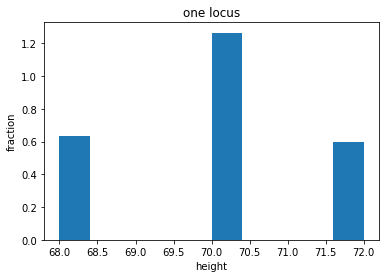

In [184]:
# depends on allele frequencies 
# let's say frequency of H = p and thus h = 1-p
# lets generate a population of individuals

n = 10000

p = .5

heights = []

for i in range(0,n):
    height = 70 # mean height
    for a in range(0,2):  # two alleles
        if random.random() < p: # if random number less than p they get H, otherwise h
            height += 1
        else:
            height -= 1
            
    heights.append(height)
    
hist = plt.hist(heights,density=True)
plt.xlabel("height")
plt.ylabel("fraction")
plt.title("one locus")
        

What if we have more than 1 locus?

Text(0.5, 1.0, '2 loci')

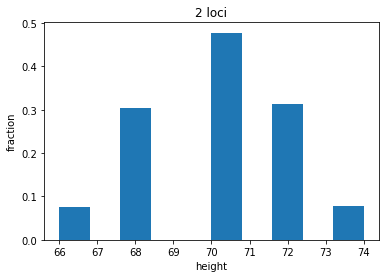

In [185]:
# two loci

loci = 2

# depends on allele frequencies 
# let's say frequency of H = p and thus h = 1-p
# lets generate a population of individuals

n = 10000

p = .5

heights = []

for i in range(0,n):
    height = 70 # mean height
    for locus in range(0,loci):
        for a in range(0,2):  # two alleles
            if random.random() < p: # if random number less than p they get H, otherwise h
                height += 1
            else:
                height -= 1
            
    heights.append(height)
    
hist = plt.hist(heights,density=True)
plt.xlabel("height")
plt.ylabel("fraction")
plt.title("%d loci" % loci)
        

Text(0.5, 1.0, '1000 loci')

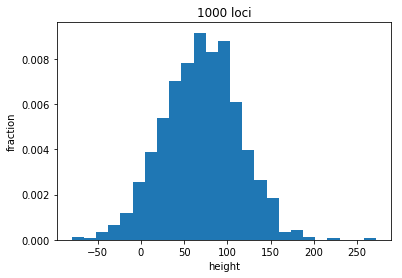

In [248]:
# many loci

loci = 1000

# depends on allele frequencies 
# let's say frequency of H = p and thus h = 1-p
# lets generate a population of individuals

n = 1000

p = .5

heights = []

for i in range(0,n):
    height = 70 # mean height
    for locus in range(0,loci):
        for a in range(0,2):  # two alleles
            if random.random() < p: # if random number less than p they get H, otherwise h
                height += 1
            else:
                height -= 1
            
    heights.append(height)
    
hist = plt.hist(heights,density=True,bins=25)
plt.xlabel("height")
plt.ylabel("fraction")
plt.title("%d loci" % loci)
        

In [243]:
def random_chained(degree=3):
    r = 1.0
    for d in range(0,degree):
        r = random.uniform(0,r)
        
    return r

Text(0.5, 1.0, '1000 loci, mean height 70.061978')

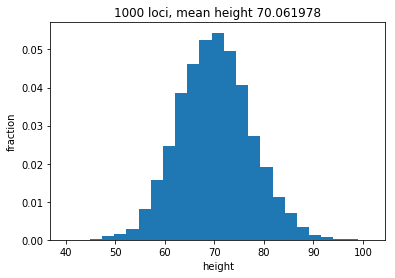

In [241]:
# variable effect sizes and frequencies

loci = 1000

effect_size = np.array([random.choice([-1,1]) * random_chained(3) for l in range(0,loci)])
allele_freq = np.array([random_chained(2) for l in range(0,loci)])
effect_size_alt = (effect_size * allele_freq) / (allele_freq - 1.0)



n = 10000

heights = []

for i in range(0,n):
    height = 70 # mean height
    for locus in range(0,loci):
        for a in range(0,2):  # two alleles
            if random.random() < allele_freq[locus]:
                height += effect_size[locus]
            else:
                height += effect_size_alt[locus] 
            
    heights.append(height)
    
hist = plt.hist(heights,density=True,bins=25)
plt.xlabel("height")
plt.ylabel("fraction")
plt.title("%d loci, mean height %f" % (loci,np.mean(heights)))
        